<font size = "5"> **[Image Tools](2_Image_Tools.ipynb)** </font>

<hr style="height:2px;border-top:4px solid #FF8200" />


#  Analyzing Spot Diffraction Pattern


[<img src=https://www.coeuscreativegroup.com/wp-content/uploads/2020/04/download-button.png, width=125>](https://raw.githubusercontent.com/pycroscopy/pyTEMlib/main/notebooks/Imaging/D2-Diffraction_Spots.ipynb) 

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/pycroscopy/pyTEMlib/blob/main/notebooks/Imaging/D2-Diffraction_Spots.ipynb)
    
    

part of 

<font size = "5"> **[pyTEMlib](https://pycroscopy.github.io/pyTEMlib/about.html)**</font>

a [pycroscopy](https://pycroscopy.github.io/pycroscopy/about.html) ecosystem package


Notebook by Gerd Duscher, 2025

Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes


## Content
An introduction into **diffraction_tools** and how to use the functions in this package to 
index spot diffraction pattern of **single crystal** sample areas.

The scope of this notebook includes calculation and plotting of 
- allowed, forbidden and dynamically activated Bragg reflections,
- Kikuchi- and HOLZ-lines.

An explanation on the physcial background can be found in the *Diffraction* chapter of MSE672-Introduction to TEM


## Install pyTEMlib

If you have not done so in the [Introduction Notebook](../0_pyTEMlib.ipynb), please test and install [pyTEMlib](https://github.com/gduscher/pyTEMlib) and other important packages with the code cell below.



## Load relevant python packages
### Check Installed Packages

In [1]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2024.1.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install git+https://github.com/pycroscopy/pyTEMlib.git@main -q --upgrade

if 'google.colab' in sys.modules:
    !{sys.executable} -m pip install numpy==1.24.4
print('done')

done


### Load the plotting and figure packages
Import the python packages that we will use:

Beside the basic numerical (numpy) and plotting (pylab of matplotlib) libraries,
* three dimensional plotting
and some libraries from the book
* diffraction_tools library.

In [1]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
%matplotlib  widget
import matplotlib.pyplot as plt
import numpy as np
import sys
if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()

# 3D plotting package used
from mpl_toolkits.mplot3d import Axes3D # 3D plotting 

# additional package 
import itertools 
import scipy

# Import libraries from the pyTEMlib
%load_ext autoreload
%autoreload 2
sys.path.insert(0, '../../')
import pyTEMlib

__notebook_version__ = '2025.12.12'
print('pyTEM version: ', pyTEMlib.__version__)
print('notebook version: ', __notebook_version__)

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
pyTEM version:  0.2025.12.1
notebook version:  2025.12.12



## Define Crystal

Define a Crystal as an ase object.
 
That allows for easy access to things like reciprocal unit cells (*atoms.cell.reciprocal()*)

With the provided crystal tools it is straight forward to change to 'Gold', 'graphite', 'Pt', or any other supported crystals. Adding structruees with POSCAR or cif files is also supported.

In [2]:
#Initialize the dictionary with all the input
atoms = pyTEMlib.crystal_tools.structure_by_name('Silicon')
print(atoms)


Lattice(symbols='Si8', pbc=True, cell=[5.43088, 5.43088, 5.43088])


## Plot Diffraction Pattern
For a minimum we need the zone_axis in Miller indices and the acceleration voltage fo the TEM.
We pack those information in a dictionary and run *get_bragg_reflections* from *diffraction_tools*

> Note:
>
> We calculate the Bragg reflections in polar coordinates.

Of the 357910 tested reciprocal lattice points 1640 have an excitation error less than 0.30 1/nm
Of the 1640 possible reflection 312 are allowed.
Of those, there are 24 in ZOLZ  and 288 in HOLZ
Of the 196 forbidden reflection in ZOLZ  0 can be dynamically activated.


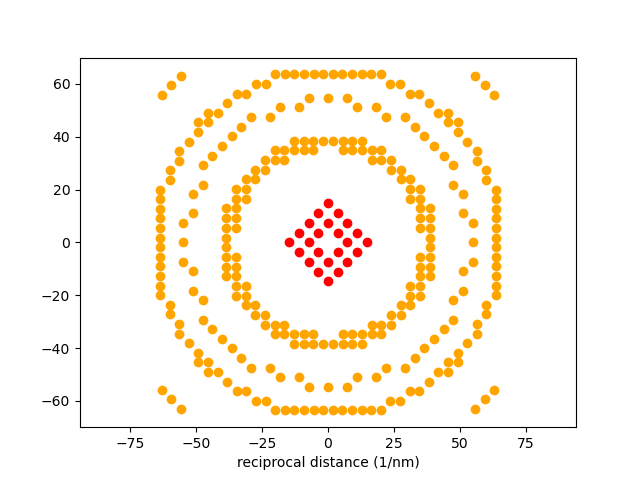

In [3]:
# --------------- INPUT ------------------------
zone_hkl = np.array([1, 1, 0])
zone_hkl = np.array([0, 0, 1])
hkl_max = 35  #  maximum allowed Miller index
sg_max = 0.03   # 1/Ang  maximum allowed excitation error

acceleration_voltage = 200.0 * 1000.0 #V

rotation = np.radians(0)  # rotation of diffraction pattern
# -------------------------------------------

tags = {'zone_hkl': zone_hkl,
        'hkl_max': hkl_max,
        'Sg_max': sg_max,
        'acceleration_voltage':  acceleration_voltage}
diff_dict ={}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 


# Simple Plot
ZOLZ = diff_dict['allowed']['ZOLZ']
HOLZ = diff_dict['allowed']['HOLZ']
r = diff_dict['allowed']['g'][:, 0]
phi = diff_dict['allowed']['g'][:, 1]

x = r *np.cos(phi+rotation)*10
y = r * np.sin(phi+rotation)*10


plt.figure()
plt.scatter(x[ZOLZ], y[ZOLZ], label='ZOLZ allowed', c='r')
plt.scatter(x[HOLZ], y[HOLZ], label="HOLZ allowed", c ='orange')
plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)');

In [4]:
diff_dict.keys(), diff_dict['allowed'].keys(), diff_dict['HOLZ'].keys()

(dict_keys(['allowed', 'forbidden', 'K_0', 'HOLZ']),
 dict_keys(['hkl', 'g', 'excitation_error', 'intensities', 'Laue_Zone', 'ZOLZ', 'FOLZ', 'SOLZ', 'HOLZ', 'HOLZ_plus']),
 dict_keys(['g_deficient', 'g_excess', 'ZOLZ', 'FOLZ', 'SOLZ', 'HOLZ_plus', 'hkl', 'intensities']))

### Allowed, Forbidden and Dynamically-Sctivated Reflections

We can now plot allowed forbidden and dynamically activated Reflections independently.

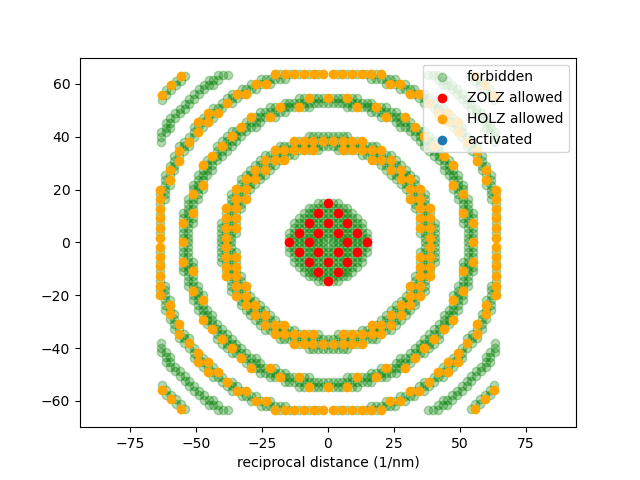

In [5]:
# ---- Input -----
rotation = np.radians(0)
# ----------------
ZOLZ = diff_dict['allowed']['ZOLZ']
HOLZ = diff_dict['allowed']['HOLZ']
r = diff_dict['allowed']['g'][:, 0]
phi = diff_dict['allowed']['g'][:, 1]

x = r *np.cos(phi+rotation)*10
y = r * np.sin(phi+rotation)*10


ZOLZ_forbidden = diff_dict['forbidden']['ZOLZ']
HOLZ_forbidden = diff_dict['forbidden']['HOLZ']
activated = (diff_dict['forbidden']['dynamically_activated'])

r_forbidden = diff_dict['forbidden']['g'][:, 0]
phi_forbidden = diff_dict['forbidden']['g'][:, 1]
x_forbidden = r_forbidden *np.cos(phi_forbidden+rotation)*10
y_forbidden = r_forbidden *np.sin(phi_forbidden+rotation)*10

x_dynamic = x_forbidden[ZOLZ_forbidden][activated]
y_dynamic = y_forbidden[ZOLZ_forbidden][activated]


plt.figure()
plt.scatter(x_forbidden, y_forbidden, label='forbidden', c='green', alpha = .3 )
plt.scatter(x[ZOLZ], y[ZOLZ], label='ZOLZ allowed', c='r')
plt.scatter(x[HOLZ], y[HOLZ], label="HOLZ allowed", c ='orange')


plt.scatter(x_dynamic, y_dynamic, label='activated')
plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)')
plt.legend();


### Plotting in Polar Coordinates

Like for ring-diffraction pattern, it is illustrative to look at the diffraction pattern in polar coordinates.

You will notece that we internally use only polar cooredinates.

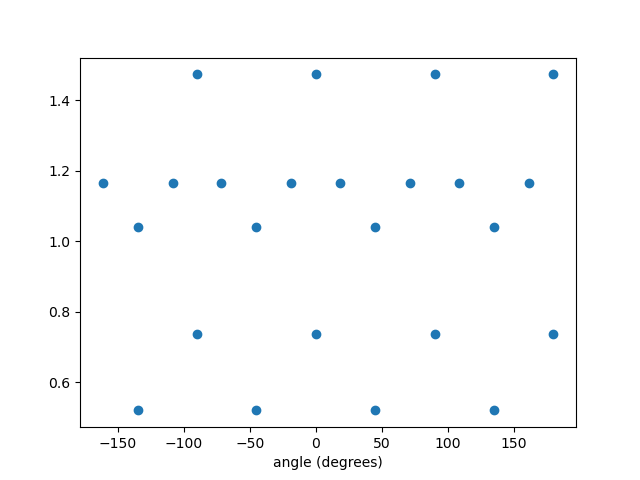

In [6]:
# ---- Input -----
rotation = np.radians(-10)
# ----------------
ZOLZ = diff_dict['allowed']['ZOLZ']
HOLZ = diff_dict['allowed']['HOLZ']
r = diff_dict['allowed']['g'][:, 0]
phi = diff_dict['allowed']['g'][:, 1]

plt.figure()
plt.scatter( np.degrees(phi)[ZOLZ], r[ZOLZ])
plt.xlabel('angle (degrees)');


### Plot Kikuchi Pattern
With the knowledge that the slope $m = \tan(\phi)$
we can plot the  perpendicular bisector of the line from origin to the Bragg peaks which are the Kikuchi lines.

Text(0.5, 0, 'reciprocal distance (1/nm)')

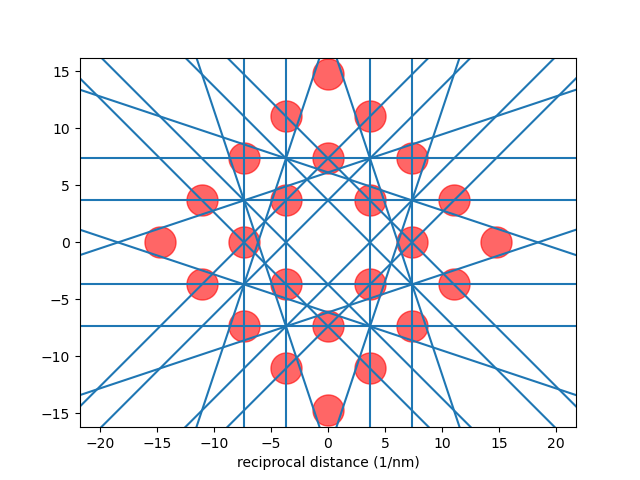

In [7]:
# ---- Input -----
rotation = np.radians(0)
size = 500 # mrad
# ----------------
ZOLZ = diff_dict['allowed']['ZOLZ']

# plotting_coordinates(diff_dict['allowed']['g'][ZOLZ], feature='spot')
r = diff_dict['allowed']['g'][ZOLZ, 0]*10
phi = diff_dict['allowed']['g'][ZOLZ, 1]

x = r *np.cos(phi+rotation)
y = r * np.sin(phi+rotation)

plt.figure()
plt.scatter(x,y, s=size, alpha = .6, c= 'r')
for i, ph in enumerate(phi+np.pi/2): 
    plt.axline( (x[i]/2,y[i]/2),slope=(np.tan(ph)))
# plt.scatter(x/2,y/2)
plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)')

In [8]:
intensities = diff_dict['allowed']['intensities']
k_0 = diff_dict['K_0']
g_norm_allowed = diff_dict['allowed']['g'][:, 0]

# Dynamic Correction
# Equation Spence+Zuo 3.86a
gamma_1 = - 1./(2.*k_0) * (intensities / (2.*k_0*diff_dict['allowed']['excitation_error'])).sum()
# Equation Spence+Zuo 3.84
kg = k_0 - k_0*gamma_1/(diff_dict['allowed']['g'][:, 2]+1e-15)
kg[diff_dict['allowed']['ZOLZ']] = k_0

# Calculate angle between K0 and deficient cone vector
# For dynamic calculations K0 is replaced by kg
kg[:] = k_0
d_theta = np.arcsin(g_norm_allowed/kg/2.) - (np.arcsin(np.abs(diff_dict['allowed']['g'][:, 2])
                                                        /g_norm_allowed))
d_theta = d_theta.real
d_theta

gd_length = 2*np.sin(d_theta/2) * k_0


## Plot HOLZ Lines

Text(0.5, 0, 'reciprocal distance (1/nm)')

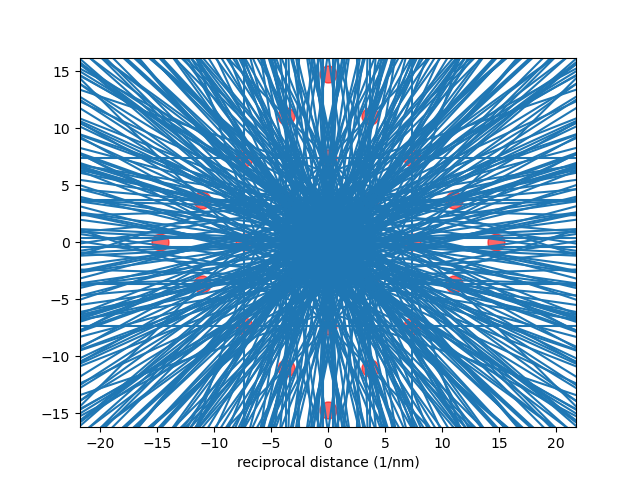

In [9]:
g_closest = diff_dict['allowed']['g'][:]
# print('g_closest before norm:', g_closest)
g_closest[:, 0] =gd_length
# print('g_closest after norm:', g_closest)
# g_closest[:, 2] = 0.


r = g_closest[:, 0]*10
phi = g_closest[:, 1]

x2 = r *np.cos(phi)
y2 = r * np.sin(phi)

plt.figure()
plt.scatter(x,y, s=150, alpha = .6, c='r')
for i, ph in enumerate(phi): 
    plt.axline( (x2[i],y2[i]),slope=(np.tan(ph+np.pi/2)))
# plt.scatter(x/2,y/2)
plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)')


In [ ]:
for i, gg in enumerate(g_closest):
        print(f"{gg[0]:.3f}, {2 * np.sin(d_theta[i].real/2) * k_0:.3f}, ",
              f"{g_norm_allowed[i]:.3f}",
              f"{np.arcsin(g_norm_allowed[i]/k_0/2.):.3f}",
              f"{(np.arcsin(np.abs(diff_dict['allowed']['g'][i, 2])/g_norm_allowed[i])):.2f}",
             f"{(np.arcsin(g_norm_allowed[i]/k_0/2.)- np.arcsin(np.abs(diff_dict['allowed']['g'][i, 2])/g_norm_allowed[i])):.2f}",
             f"{d_theta[i]:.3f}")

Of the 19682 tested reciprocal lattice points 507 have an excitation error less than 0.50 1/nm
Of the 507 possible reflection 106 are allowed.
Of those, there are 12 in ZOLZ  and 94 in HOLZ
Of the 72 forbidden reflection in ZOLZ  0 can be dynamically activated.


Text(0.5, 0, 'reciprocal distance (1/nm)')

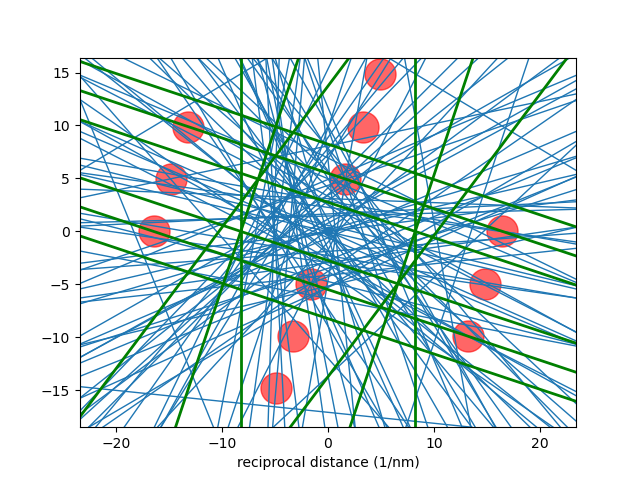

In [142]:
def calculate_holz(dif):
    """ Calculate HOLZ lines (of allowed reflections)"""
    intensities = diff_dict['allowed']['intensities']
    k_0 = diff_dict['K_0']

    g_norm_allowed = diff_dict['allowed']['g'][:, 0]

    # Dynamic Correction
    # Equation Spence+Zuo 3.86a
    print(np.where(k_0*diff_dict['allowed']['excitation_error']==0))
    
    gamma_1 = - 1./(2.*k_0) * (intensities / (2.*k_0*diff_dict['allowed']['excitation_error'])).sum()
    # Equation Spence+Zuo 3.84
    kg = k_0 - k_0*gamma_1/(diff_dict['allowed']['g'][:, 2]+1e-15)
    kg[diff_dict['allowed']['ZOLZ']] = k_0

    # Calculate angle between K0 and deficient cone vector
    # For dynamic calculations K0 is replaced by kg
    kg[:] = k_0
    d_theta = np.abs(np.arcsin(g_norm_allowed/k_0/2.) - (np.arcsin(diff_dict['allowed']['g'][:, 2])
                                                            /(g_norm_allowed+1e-15)))
    # print('k', d_theta, g_norm_allowed, k_0)
    # calculate length of distance of deficient cone to K0 in ZOLZ plane
    
    # Calculate nearest point of HOLZ and Kikuchi lines
    HOLZ = dif['allowed']['HOLZ']
    g_closest = dif['allowed']['g'] * 1.0
    print('len', len(g_closest))
    
    print(k_0)
    g_closest[:, 0] = 2 * np.sin(d_theta.real/2) * k_0
    g_closest[:, 1] += np.pi
    
    print(np.round(2 * np.sin(d_theta.real/2) * k_0, 2))
    # calculate and save line in Hough space coordinates (distance and theta)
    g_excess = dif['allowed']['g'] *1.0
    g_excess[:, 0] += dif['allowed']['g'][:, 0]
    
    dif['HOLZ'] = {}
    dif['HOLZ']['g_deficient'] = g_closest
    dif['HOLZ']['g_excess'] = g_excess
    dif['HOLZ']['ZOLZ'] = dif['allowed']['ZOLZ']
    dif['HOLZ']['HOLZ'] = dif['allowed']['HOLZ']
    # dif['HOLZ']['FOLZ'] = dif['allowed']['FOLZ']
    # dif['HOLZ']['SOLZ'] = dif['allowed']['SOLZ']
    # dif['HOLZ']['HHOLZ'] = dif['allowed']['HHOLZ']  # even higher HOLZ
    dif['HOLZ']['hkl'] = dif['allowed']['hkl']
    dif['HOLZ']['intensities'] = intensities

    return dif
tags = {'acceleration_voltage_V': 99.2 * 1000.0,  # V
      'convergence_angle_mrad': 7.15,  # mrad;
      'zone_hkl': np.array([-2, 2, 1]),
      'mistilt': np.array([0, 0, 0]),  # mistilt in degrees
      'Sg_max': .05,  # 1/A  maximum allowed excitation error
      'hkl_max': 13}  # Highest evaluated Miller indices

diff_dict = {}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 

# dif = calculate_holz(diff_dict)
ZOLZ = diff_dict['allowed']['ZOLZ']
r = diff_dict['allowed']['g'][ZOLZ, 0]*10
phi = diff_dict['allowed']['g'][ZOLZ, 1]

x = r *np.cos(phi+rotation)
y = r * np.sin(phi+rotation)
HOLZ = diff_dict['allowed']['HOLZ']
r_k = diff_dict['HOLZ']['g_deficient'][HOLZ, 0]*10
phi_k = diff_dict['HOLZ']['g_deficient'][HOLZ, 1]
x_k = r_k *np.cos(phi_k+rotation)
y_k = r_k * np.sin(phi_k+rotation)

plt.figure()
plt.scatter(x,y, s=500, alpha = .6, c='r')

for i, ph in enumerate(phi_k): 
    plt.axline( (x_k[i],y_k[i]),slope=(np.tan(ph+np.pi/2)), linewidth=1)
for i, ph in enumerate(phi): 
    plt.axline( (x[i]/2,y[i]/2),slope=(np.tan(ph+np.pi/2)), c='g', linewidth=2)
plt.scatter([0], [0])
plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)')

In [53]:
def plotting_coordinates(g, rotation=0, feature='spot'):
    x = g[:, 0] * np.cos(g[:, 1]+rotation)*10
    y = g[:, 0] * np.sin(g[:, 1]+rotation)*10

    if feature == 'line':
        return np.stack((x, y, np.tan(g[:, 1]+np.pi/2)), axis= 1)
    return np.stack((x, y), axis= 1) 

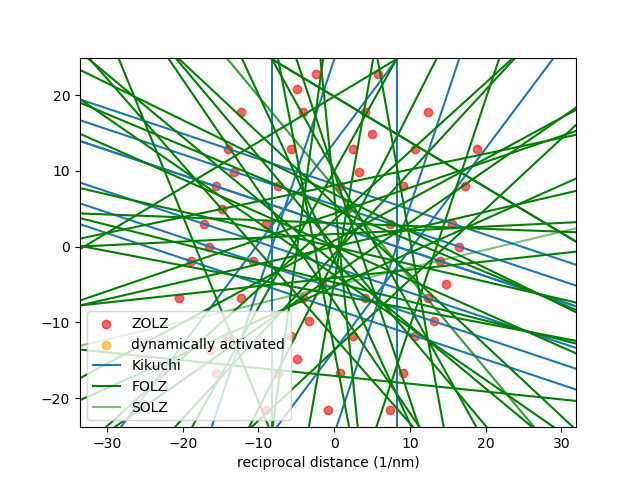

In [197]:
tags = {'acceleration_voltage_V': 99.2 * 1000.0,  # V
      'convergence_angle_mrad': 7.15,  # mrad;
      'zone_hkl': np.array([-2, 2, 1]),
      'mistilt': np.array([0, 0, 0]),  # mistilt in degrees
      'Sg_max': .05,  # 1/A  maximum allowed excitation error
      'hkl_max': 9}  # Highest evaluated Miller indices

diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags) 


zolz = diff_dict['allowed']['ZOLZ']
xy_zolz = plotting_coordinates(diff_dict['allowed']['g'][:])

g_f = diff_dict['forbidden']['g'][diff_dict['forbidden']['ZOLZ']]
dynamic = diff_dict['forbidden']['dynamically_activated']
xy_dynamic = plotting_coordinates(g_f[dynamic])
kikuchi = diff_dict['HOLZ']['ZOLZ']
xy_kikuchi = plotting_coordinates(diff_dict['HOLZ']['g_deficient'][kikuchi], feature='line')
folz = np.logical_or(diff_dict['HOLZ']['FOLZ'], diff_dict['HOLZ']['SOLZ']) 
folz = diff_dict['HOLZ']['FOLZ']
solz = diff_dict['HOLZ']['SOLZ']
hholz = diff_dict['HOLZ']['HOLZ_plus']
xy_folz = plotting_coordinates(diff_dict['HOLZ']['g_deficient'][folz], feature='line')
xy_solz = plotting_coordinates(diff_dict['HOLZ']['g_deficient'][solz], feature='line')
xy_hholz = plotting_coordinates(diff_dict['HOLZ']['g_deficient'][hholz], feature='line')


plt.close('all')
plt.figure()
plt.scatter(xy_zolz[:, 0], xy_zolz[:, 1], alpha = .6, c='r', label='ZOLZ')
plt.scatter(xy_dynamic[:, 0], xy_dynamic[:, 1], alpha = .6, c='orange', label='dynamically activated')
plt.axline(xy_kikuchi[0, :2], slope=xy_kikuchi[0, 2], label='Kikuchi')
for xy in xy_kikuchi:
    plt.axline(xy[:2], slope=xy[2])

if len(xy_folz) > 0:
    plt.axline(xy_folz[0, :2], slope=xy_folz[0, 2], label='FOLZ', c='g')
    for xy in xy_folz:
        plt.axline(xy[:2], slope=xy[2], c='g')
plt.axline(xy_solz[0, :2], slope=xy_solz[0, 2], label='SOLZ', c='g' ,alpha=0.5)
for xy in xy_solz:
    plt.axline(xy[:2], slope=xy[2], c='g', alpha=0.5)
if len(xy_hholz) > 0:
    plt.axline(xy_hholz[0, :2], slope=xy_hholz[0, 2], label='HHOLZ', c='r' ,alpha=0.2)
    for xy in xy_hholz:
        plt.axline(xy[:2], slope=xy[2], c='r', alpha=0.2)
plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)')
plt.legend();

In [ ]:
def plot_d
zolz = diff_dict['allowed']['ZOLZ']
xy_zolz = plotting_coordinates(diff_dict['allowed']['g'][zolz])

g_f = diff_dict['forbidden']['g'][diff_dict['forbidden']['ZOLZ']]
dynamic = diff_dict['forbidden']['dynamically_activated']
xy_dynamic = plotting_coordinates(g_f[dynamic])
kikuchi = diff_dict['HOLZ']['ZOLZ']
xy_kikuchi = plotting_coordinates(diff_dict['HOLZ']['g_deficient'][kikuchi], feature='line')
folz = np.logical_or(diff_dict['HOLZ']['FOLZ'], diff_dict['HOLZ']['SOLZ']) 
folz = diff_dict['HOLZ']['FOLZ']
solz = diff_dict['HOLZ']['SOLZ']
hholz = diff_dict['HOLZ']['HOLZ_plus']
xy_folz = plotting_coordinates(diff_dict['HOLZ']['g_deficient'][folz], feature='line')
xy_solz = plotting_coordinates(diff_dict['HOLZ']['g_deficient'][solz], feature='line')
xy_hholz = plotting_coordinates(diff_dict['HOLZ']['g_deficient'][hholz], feature='line')


plt.close('all')
plt.figure()
plt.scatter(xy_zolz[:, 0], xy_zolz[:, 1], alpha = .6, c='r', label='ZOLZ')
plt.scatter(xy_dynamic[:, 0], xy_dynamic[:, 1], alpha = .6, c='orange', label='dynamically activated')
plt.axline(xy_kikuchi[0, :2], slope=xy_kikuchi[0, 2], label='Kikuchi')
for xy in xy_kikuchi:
    plt.axline(xy[:2], slope=xy[2])

if len(xy_folz) > 0:
    plt.axline(xy_folz[0, :2], slope=xy_folz[0, 2], label='FOLZ', c='g')
    for xy in xy_folz:
        plt.axline(xy[:2], slope=xy[2], c='g')
plt.axline(xy_solz[0, :2], slope=xy_solz[0, 2], label='SOLZ', c='g' ,alpha=0.5)
for xy in xy_solz:
    plt.axline(xy[:2], slope=xy[2], c='g', alpha=0.5)
if len(xy_hholz) > 0:
    plt.axline(xy_hholz[0, :2], slope=xy_hholz[0, 2], label='HHOLZ', c='r' ,alpha=0.2)
    for xy in xy_hholz:
        plt.axline(xy[:2], slope=xy[2], c='r', alpha=0.2)
plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)')
plt.legend();

In [204]:
diff_dict['HOLZ'].keys()

[autoreload of pyTEMlib.diffraction_tools.diffraction_plot failed: Traceback (most recent call last):
  File "/nfs/home/gduscher/proj/qt5/lib/python3.13/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
    ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nfs/home/gduscher/proj/qt5/lib/python3.13/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/nfs/home/gduscher/proj/qt5/lib/python3.13/importlib/__init__.py", line 129, in reload
    _bootstrap._exec(spec, module)
    ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 1022, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1160, in get_code
  File "<frozen importlib._bootstrap_external>", line 1090, in source_to_code
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "

dict_keys(['g_deficient', 'g_excess', 'ZOLZ', 'FOLZ', 'SOLZ', 'HOLZ_plus', 'hkl', 'intensities'])

[autoreload of pyTEMlib.diffraction_tools.diffraction_plot failed: Traceback (most recent call last):
  File "/nfs/home/gduscher/proj/qt5/lib/python3.13/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
    ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nfs/home/gduscher/proj/qt5/lib/python3.13/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/nfs/home/gduscher/proj/qt5/lib/python3.13/importlib/__init__.py", line 129, in reload
    _bootstrap._exec(spec, module)
    ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 1022, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1160, in get_code
  File "<frozen importlib._bootstrap_external>", line 1090, in source_to_code
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "

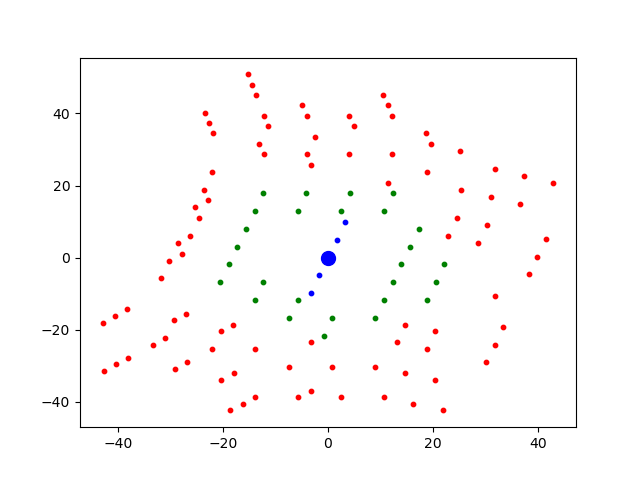

In [202]:
tags = {'acceleration_voltage_V': 99.2 * 1000.0,  # V
      'convergence_angle_mrad': 7.15,  # mrad;
      'zone_hkl': np.array([-2, 2, 1]),
      'mistilt': np.array([0, 0, 0]),  # mistilt in degrees
      'Sg_max': .03,  # 1/A  maximum allowed excitation error
      'hkl_max': 19}  # Highest evaluated Miller indices

diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags) 
diff_dict['output'] = {}
fig = pyTEMlib.diffraction_tools.plot_diffraction_pattern(diff_dict, diffraction_pattern=None)


In [158]:
xy_kikuchi[:10], xy_zolz[:10]/2

dict_keys(['allowed', 'forbidden', 'K_0', 'HOLZ', 'output'])

In [186]:
diff_dict['allowed']['g']

array([[ 5.20804570e-01,  3.14159265e+00, -3.65089028e-17],
       [ 5.20804570e-01, -2.67514294e-17,  3.65089028e-17],
       [ 6.64476896e-01, -2.44685438e+00, -4.29641851e-01],
       [ 8.02585777e-01,  2.18668946e-01,  6.13774072e-02],
       [ 8.02585777e-01,  2.92292371e+00,  6.13774072e-02],
       [ 6.64476896e-01, -6.94738276e-01, -4.29641851e-01],
       [ 8.02094726e-01,  1.57079633e+00,  5.52396665e-01],
       [ 1.04160914e+00,  3.14159265e+00, -7.30178056e-17],
       [ 1.04160914e+00, -2.67514294e-17,  7.30178056e-17],
       [ 9.63997888e-01,  9.82793723e-01,  5.52396665e-01],
       [ 9.63997888e-01,  2.15879893e+00,  5.52396665e-01],
       [ 1.10600813e+00, -3.94791120e-01, -4.29641851e-01],
       [ 1.10600813e+00, -2.74680153e+00, -4.29641851e-01],
       [ 1.31734564e+00,  3.00904112e+00,  6.13774072e-02],
       [ 1.31734564e+00,  1.32551532e-01,  6.13774072e-02],
       [ 1.02900450e+00, -1.81577499e+00, -9.20661108e-01],
       [ 1.33682454e+00,  6.43501109e-01

(2.8206, -2.7006, -2.1500000000000004, 3.01)


Text(0.5, 0, 'reciprocal distance (1/nm)')

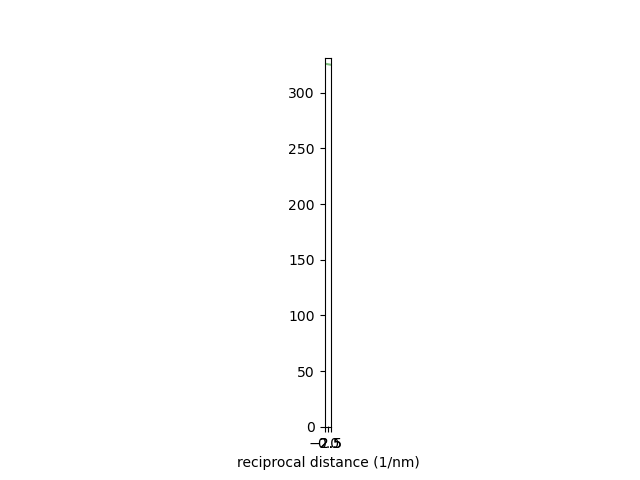

In [173]:
image = plt.imread("./Zuo-HOLZ-experiment.jpg")
tagsD ={}
tagsD['plot image FOV'] = .516
tagsD['plot shift x'] = 0.006
tagsD['plot shift y'] = .043
O_stig = 1.07

l = -tagsD['plot image FOV']/2*O_stig + tagsD['plot shift x']
r = tagsD['plot image FOV']/2*O_stig + tagsD['plot shift x']
t = -tagsD['plot image FOV']/2+tagsD['plot shift y']
b = tagsD['plot image FOV']/2+tagsD['plot shift y']

print((r*10,l*10,t*10,b*10))
plt.figure()
plt.imshow(image, extent=(r,l,t,b)*10)
plt.axline(xy_solz[0, :2], slope=xy_solz[0, 2], label='SOLZ', c='g' ,alpha=0.5)
#for xy in xy_solz:
#    plt.axline(xy[:2]-320, slope=xy[2], c='g', alpha=0.5)
# plt.legend();


# plt.axis('equal')
plt.xlim(-3, 3)
plt.xlabel('reciprocal distance (1/nm)')

In [174]:
xy_solz[:3]

array([[ 5.56902032e+01,  3.15577818e+02, -1.76470588e-01],
       [-5.56902032e+01,  3.15577818e+02,  1.76470588e-01],
       [-1.23128089e+02,  2.32575279e+02,  5.29411765e-01]])

In [169]:
for xy in xy_solz:
    plt.axline(xy[:2], slope=xy[2], c='g', alpha=0.5)
plt.imshow(image, extent=(r,l,t,b))

In [139]:
diff_dict['HOLZ'].keys()

dict_keys(['g_deficient', 'g_excess', 'ZOLZ', 'FOLZ', 'SOLZ', 'HOLZ_plus', 'hkl', 'intensities'])

Of the 29790 tested reciprocal lattice points 682 have an excitation error less than 0.50 1/nm
Of the 682 possible reflection 137 are allowed.
Of those, there are 12 in ZOLZ  and 125 in HOLZ
Of the 72 forbidden reflection in ZOLZ  0 can be dynamically activated.


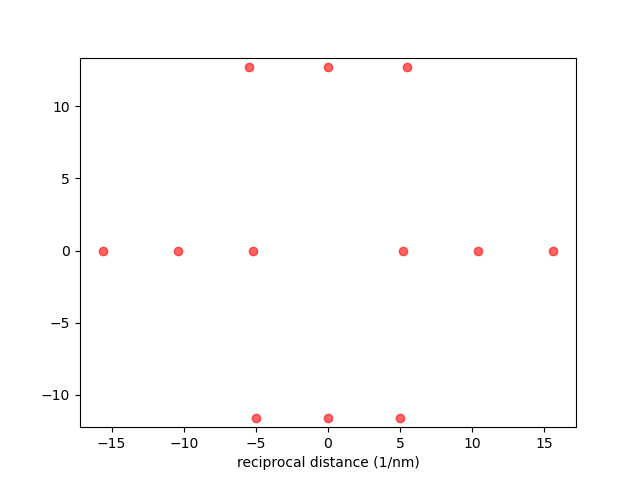

In [152]:
# --------------- INPUT ------------------------
crystal = 'Silicon'
zone_hkl = np.array([1, 1, 1])
zone_hkl = np.array([2, 1, 1])
#zone_hkl = np.array([0, 0, 1])
hkl_max = 25  #  maximum allowed Miller index
sg_max = 0.03   # 1/Ang  maximum allowed excitation error

acceleration_voltage = 200.0 * 1000.0 #V

rotation = np.radians(40)  # rotation of diffraction pattern
# -------------------------------------------
atoms = pyTEMlib.crystal_tools.structure_by_name(crystal)

tags = {'zone_hkl': zone_hkl,
        'hkl_max': hkl_max,
        'Sg_max': sg_max,
        'acceleration_voltage':  acceleration_voltage}

tags = {'acceleration_voltage_V': 99.2 * 1000.0,  # V
                  'convergence_angle_mrad': 7.15,  # mrad;
                  'zone_hkl': np.array([-2, 2, 1]),
                  'mistilt': np.array([0, 0, 0]),  # mistilt in degrees
                  'Sg_max': .05,  # 1/A  maximum allowed excitation error
                  'hkl_max': 15  # Highest evaluated Miller indices
                  }
diff_dict ={}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 

zolz = diff_dict['allowed']['ZOLZ']
xy_zolz = plotting_coordinates(diff_dict['allowed']['g'][zolz])


holz = diff_dict['HOLZ']['SOLZ']

r_holz = diff_dict['HOLZ']['g_deficient'][holz, 0]*10
phi_holz = diff_dict['HOLZ']['g_deficient'][holz, 1]

x_holz = r_holz *np.cos(phi_holz)
y_holz = r_holz * np.sin(phi_holz)

plt.figure()
plt.scatter(xy_zolz[:, 0], xy_zolz[:, 1], alpha = .6, c='r')
#for i, ph in enumerate(phi): 
#    plt.axline( (x[i]/2,y[i]/2),slope=(np.tan(ph+np.pi/2)), linewidth=2)
#for i, ph in enumerate(phi_holz): 
#    plt.axline( (x_holz[i],y_holz[i]),slope=(np.tan(ph+np.pi/2)), color='green', alpha = .5, linestyle='--')

# plt.scatter(x/2,y/2)
plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)');

In [104]:
plt.close('all')
print(diff_dict['forbidden'].keys())

dict_keys(['hkl', 'g', 'Laue_Zone', 'ZOLZ', 'HOLZ', 'dynamically_activated'])


Text(0.5, 0, 'reciprocal distance (1/nm)')

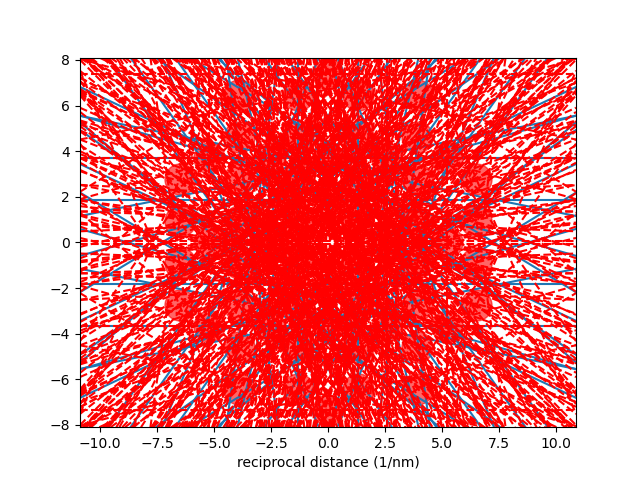

In [48]:
# ---- Input -----
rotation = np.radians(0)
size = 500 # mrad
# ----------------
ZOLZ = diff_dict['allowed']['ZOLZ']
r = diff_dict['allowed']['g'][ZOLZ, 0]*10
phi = diff_dict['allowed']['g'][ZOLZ, 1]

x = r *np.cos(phi+rotation)
y = r * np.sin(phi+rotation)

#dif = calculate_holz(diff_dict)
r_holz = diff_dict['HOLZ']['g_deficient'][:, 0]*10
phi_holz = diff_dict['HOLZ']['g_deficient'][:, 1]

x2 = r_holz *np.cos(phi_holz)
y2 = r_holz * np.sin(phi_holz)
plt.figure()
plt.scatter(x,y, s=size, alpha = .6, c='r')
for i, ph in enumerate(phi): 
    plt.axline( (x[i]/2,y[i]/2),slope=(np.tan(ph+np.pi/2)))
# plt.scatter(x/2,y/2)
for i, ph in enumerate(phi_holz): 
    plt.axline( (x2[i],y2[i]),slope=(np.tan(ph+np.pi/2)), color='red', linestyle='--')

plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)')

In [90]:
def plotting_coordinates(diff_dict['allowed']['g'][ZOLZ], rotation=0, feature='spot')
    r = diff_dict['allowed']['g'][0]*10
    phi = diff_dict['allowed']['g'][1]

    x = r *np.cos(phi+rotation)
    y = r * np.sin(phi+rotation)

    if feature == 'line':
        return x, y, np.tan(phi+np.pi/2)
    return x, y

SyntaxError: invalid syntax (1340501377.py, line 1)

In [53]:
# ---- Input -----
rotation = np.radians(0)  # Adjust rotation as needed
size = 500  # Marker size for plotting
# ----------------

lc = tags_out['Laue_circle']
gd = np.dot(tags_out['HOLZ']['g_deficient'] + lc, r_mat)
ge = np.dot(tags_out['HOLZ']['g_excess'], r_mat)
points = np.dot(tags_out['allowed']['g'] + lc, r_mat)

# Ensure r is correctly defined for HOLZ reflections
r_holz = diff_dict['allowed']['g'][HOLZ, 0]  # Extract radial distances for HOLZ
phi_holz = diff_dict['allowed']['g'][HOLZ, 1]  # Extract angles for HOLZ

# Convert polar coordinates to Cartesian coordinates
x_holz = r_holz * np.cos(phi_holz + rotation) * 10
y_holz = r_holz * np.sin(phi_holz + rotation) * 10

# Plot HOLZ lines
plt.figure()
plt.scatter(x_holz, y_holz, s=size, alpha=0.6, label='HOLZ')
for i, ph in enumerate(phi_holz):
    plt.axline((x_holz[i] / 2, y_holz[i] / 2), slope=np.tan(ph + np.pi / 2), color='blue', alpha=0.5)
plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)')


NameError: name 'tags_out' is not defined

### All Possible and Allowed Reflections

see
- [Structure Factors](CH2_04-Structure_Factors.ipynb)
- [Kinematic Scattering Geometry](CH2_06-Kinematic_Scattering_Geometry.ipynb)
for details

Because the nuclei of the atoms in a material are positive, there is a small acceleration of the electron within the material.

We add this to the contribution to the magnitude of the incident wave-vector. 
The acceleration potential is called *inner potential* and is calculated from the scattering factors $f_e$ according to (Kirkland Eq 6.10:

$$U_{\vec{G}} =  \frac{h^2}{2 \pi m_e e} \frac{1}{V_{unit-cell}} \sum_j f_{e_j} (|\vec{G}|) \exp(-2\pi i \vec{G} \cdot \vec{r_j})$$ 
which reduces for $|\vec{G}| = 0$ to:

$$U_{0} =  \frac{h^2}{2 \pi m_e e} \frac{1}{V_{unit-cell}} \sum_j f_{e_j} (0)$$
 which forms an uniform potential inside the material


In [33]:
# --------------- INPUT ------------------------
zone_hkl = np.array([1, 1, 0])
hkl_max = 35  #  maximum allowed Miller index
sg_max = 0.03   # 1/Ang  maximum allowed excitation error

acceleration_voltage = 200.0 * 1000.0 #V
# -------------------------------------------

wave_length_A = pyTEMlib.diffraction_tools.get_wavelength(acceleration_voltage, 'A')


def get_inner_potential(atoms):
    """ inner potential in Volts """
    u_0 = 0  # in (Ang)
    # atom form factor of zero reflection angle is the inner potential in 1/A
    for atom in atoms:
        u_0 += pyTEMlib.diffraction_tools.form_factor(atom.symbol, 0)
    scattering_factor_to_volts = ((scipy.constants.h*1e10)**2
                                  / (2 * np.pi * scipy.constants.m_e * scipy.constants.e)
                                  / atoms.cell.volume)
    return u_0 * scattering_factor_to_volts


u_0 = get_inner_potential(atoms)

# print(f'The inner potential is {u_0:.2f}V')

def ewald_sphere_center(acceleration_voltage, atoms):
    """ Ewald sphere center in 1/Angstrom """
    wave_length = pyTEMlib.diffraction_tools.get_wavelength(acceleration_voltage, unit='A')
    incident_wave_vector_vacuum = 1/wave_length
    u_0 = get_inner_potential(atoms)
    incident_wave_vector = np.sqrt(1/wave_length**2 + u_0 )#1/Ang
    
    center = np.dot(zone_hkl, atoms.cell.reciprocal())
    center = center / np.linalg.norm(center) * incident_wave_vector
    return center
    

def get_all_reflections(atoms, hkl_max, sg_max=None, ewald_center=None, verbose=False):
    """ get all reflections """
    hkl  = pyTEMlib.diffraction_tools.get_all_miller_indices(hkl_max)
    g = np.dot(hkl, atoms.cell.reciprocal()) # all evaluated reciprocal lattice points
    g_norm = np.linalg.norm(g, axis=1)
    indices = np.argsort(g_norm)
    hkl = hkl[indices]
    g = g[indices]

    if sg_max is None:
        return hkl, g
    
    # Calculate excitation errors for all reciprocal lattice points
    ## Zuo and Spence, 'Adv TEM', 2017 -- Eq 3:14
    k0_magnitude = np.linalg.norm(ewald_center)
    excitation_error = ((k0_magnitude**2- np.linalg.norm(g - ewald_center, axis=1)**2)
                        / (2*k0_magnitude))

    # Determine reciprocal lattice points with excitation error less than the maximum allowed one: Sg_max
    reflections = abs(excitation_error)< sg_max

    sg = excitation_error[reflections]
    g_hkl = g[reflections]
    hkl = hkl[reflections] 
    if verbose:
        print (f'Of the {len(g)} tested reciprocal lattice points'),
        print(f'{len(g_hkl)} have an excitation error less than {sg_max*10:.2f} 1/nm')

    return hkl, g_hkl, sg
    
#ewald_center = ewald_sphere_center(acceleration_voltage, atoms)
#hkl, g_hkl, sg = get_all_reflections(atoms, hkl_max, sg_max, ewald_center, verbose=True)


def get_projection(atoms, zone_hkl, g_hkl, center_ewald, verbose=True):
    
    zone_vector = np.dot(zone_hkl, atoms.cell.reciprocal())
    rotation_matrix, theta, phi = zone_rotation(zone_vector)
    center_ewald = np.dot(center_ewald, rotation_matrix)
    g_hkl_rotated = np.dot(g_hkl, rotation_matrix)

    center_ewald[:2] = 0.
    g_hkl_spherical = g_hkl_rotated + center_ewald
    r_spherical = np.linalg.norm(g_hkl_spherical, axis = 1)
    theta = np.acos(g_hkl_spherical[:, 2] / r_spherical)
    
    phi = np.atan2(g_hkl_spherical[:, 0], g_hkl_spherical[:, 1])
    r = np.tan(theta) * center_ewald[2]

    return np.stack((r, phi), axis=1)


def get_dynamically_activated(out_tags, verbose=False):
    ZOLZ_allowed = out_tags['allowed']['ZOLZ']
    hkl_allowed = out_tags['allowed']['hkl'][ZOLZ]
    
    ZOLZ_forbidden = out_tags['forbidden']['ZOLZ']
    hkl_forbidden = out_tags['forbidden']['hkl'][ZOLZ_forbidden].tolist()
    indices = range(len(hkl_allowed))
    combinations = [list(x) for x in itertools.permutations(indices, 2)]

    dynamically_activated = np.zeros(len(hkl_forbidden), dtype=bool)
    for [i, j] in combinations:
        possible = (hkl_allowed[i] + hkl_allowed[j]).tolist()
        if possible in hkl_forbidden:
            dynamically_activated[hkl_forbidden.index(possible)] = True
    out_tags['forbidden']['dynamically_activated'] = dynamically_activated
    

def sort_bragg(atoms, g_hkl):
    """ Sort """
    structure_factors = pyTEMlib.diffraction_tools.get_structure_factors(atoms, g_hkl)
    allowed = np.absolute(structure_factors) > 0.000001
    forbidden = np.logical_not(allowed)
    return allowed, forbidden, structure_factors

    
def find_sorted_bragg_reflections(atoms, zone_hkl, hkl_max, sg_max, verbose=True):
    """ sort reflection in allowed and forbidden"""
    ewald_center = ewald_sphere_center(acceleration_voltage, atoms)
    hkl, g_hkl, sg = get_all_reflections(atoms, hkl_max, sg_max, ewald_center, verbose=verbose)

    g = get_projection(atoms, zone_hkl, g_hkl, ewald_center, verbose=verbose)
    allowed, forbidden, structure_factors = sort_bragg(atoms, g_hkl)
    if verbose:
        print(f'Of the {hkl.shape[0]} possible reflection {allowed.sum()} are allowed.')
    
    
    laue_zone = np.floor(abs(np.dot(hkl[allowed], zone_hkl)))# works only for cubic crystal systems
    # zone_axis = np.dot(zone_hkl, atoms.cell.array)
    # laue_zone = np.floor(abs(np.dot(g[allowed], zone_axis)) ) # works for all crystal systems

    """thickness = tags['thickness']
    if thickness > 0.1:
        i_g = np.real(np.pi ** 2 / xi_g**2 * np.sin(np.pi * thickness * sg[allowed])**2
                      / (np.pi * sg[allowed])**2)
        dif['allowed']['Ig'] = i_g
    """
    # information of allowed reflections
    out_tags = {'allowed': {'hkl': hkl[allowed][:],
                            'g': g[allowed, :],
                            'excitation_error': sg[allowed],
                            'intensities': structure_factors[allowed]**2,
                            'Laue_Zone': laue_zone,
                            'ZOLZ': laue_zone == 0,
                            'HOLZ': laue_zone > 0},
                'forbidden':{'hkl':  hkl[forbidden][:],
                             'g':  g[forbidden, :],},
                'incident_wave_vector': np.linalg.norm(ewald_center)}

    laue_zone_f = np.floor(abs(np.dot(hkl[forbidden], zone_hkl)))# works only for cubic crystal systems
    out_tags['forbidden']['Laue_Zone'] = laue_zone_f
    out_tags['forbidden']['ZOLZ'] = laue_zone_f == 0
    out_tags['forbidden']['HOLZ'] = laue_zone_f > 1

    if verbose:
        print (f'Of those, there are {out_tags['allowed']['ZOLZ'].sum()} in ZOLZ and {out_tags['allowed']['HOLZ'].sum()} in HOLZ')
    
    get_dynamically_activated(out_tags, verbose=verbose)
    return out_tags  


def zone_rotation(zone, verbose=False):
    
    #spherical coordinates of zone
    r = np.linalg.norm(zone)
    theta = np.arccos(zone[2]/r)
    if zone[0] < 0:
        theta = -theta
    if zone[0] == 0:
        phi= np.pi/2
    else: 
        phi = np.atan2(zone[1], zone[0])

    if verbose:
        print('Rotation theta ',np.degrees(theta),' phi ',np.degrees(phi))
    r = pyTEMlib.utilities.get_rotation_matrix([0, -theta, -phi], in_radians=True)
    return r.T, theta, phi
# zone axis in global coordinate system

#zone_vector = np.dot(zone_hkl,reciprocal_unit_cell)
#rotation_matrix, theta, phi = zone_rotation(zone_vector)
#zone_rotation_matrix(zone_vector)

diff_dict = find_sorted_bragg_reflections(atoms, zone_hkl, hkl_max, sg_max, verbose=True)
print('done')


Of the 357910 tested reciprocal lattice points
2108 have an excitation error less than 0.30 1/nm
Of the 2108 possible reflection 404 are allowed.
Of those, there are 56 in ZOLZ and 348 in HOLZ
done


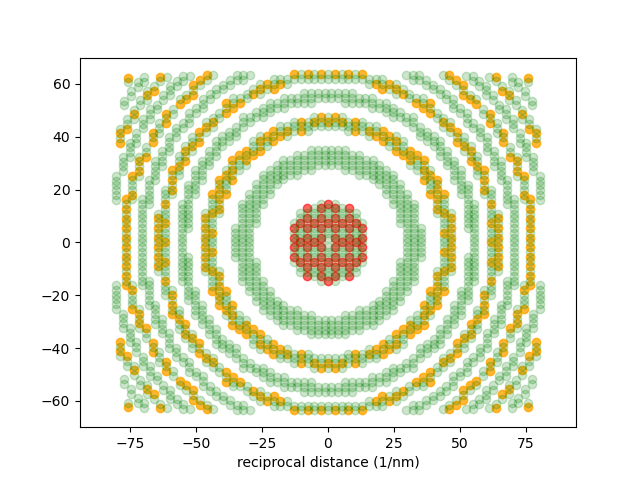

In [38]:
ZOLZ = diff_dict['allowed']['ZOLZ']
r = diff_dict['allowed']['g'][:, 0]*10
phi = diff_dict['allowed']['g'][:, 1]

x = r *np.cos(phi+rotation)
y = r * np.sin(phi+rotation)

r = diff_dict['forbidden']['g'][:, 0]*10
phi = diff_dict['forbidden']['g'][:, 1]

xf = r *np.cos(phi+rotation)
yf = r * np.sin(phi+rotation)

plt.figure()
plt.scatter(x[ZOLZ], y[ZOLZ], alpha = .6, c='r')
plt.scatter(x[HOLZ], y[HOLZ], alpha = .8, c='orange')
plt.scatter(xf, yf, alpha = .2, c='g')
plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)');

## Conclusion
The scattering geometry provides all the tools to determine which reciprocal lattice points are possible and which of them are allowed.

The diffraction pattern is a projection onto the plane perpendicular to the zone axis. For an easy projection we tilt everything so that the x,y plane  is our projection plane.